In [0]:
# !pip install fastai==0.7.0
# import sys
# !{sys.executable} -m pip install torchtext==0.2.3

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Linear-Regression-problem" data-toc-modified-id="Linear-Regression-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression problem</a></div><div class="lev1 toc-item"><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Gradient Descent</a></div><div class="lev1 toc-item"><a href="#Gradient-Descent---Classification" data-toc-modified-id="Gradient-Descent---Classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Gradient Descent - Classification</a></div><div class="lev1 toc-item"><a href="#Gradient-descent-with-numpy" data-toc-modified-id="Gradient-descent-with-numpy-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Gradient descent with numpy</a></div>

In [0]:
%matplotlib inline
from fastai.learner import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
def lin(a, b, x): return a * x + b

def gen_fake_data(n, a, b):
  x = s = np.random.uniform(0, 1, n)
  y = lin(a, b, x) + 0.1 * np.random.normal(0, 3, n)
  return x, y

x, y = gen_fake_data(50, 3., 8.)

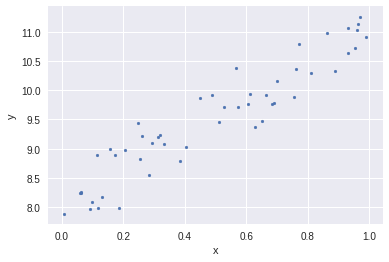

In [3]:
plt.scatter(x, y, s=8)
plt.xlabel("x")
plt.ylabel("y");

You want to find **parameters** (weights) $a$ and $b$ such that you minimize the *error* between the points and the line $a\cdot x + b$. Note that here $a$ and $b$ are unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

Suppose we believe $a = 10$ and $b = 5$ then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
y_hat = lin(10, 5, x)

In [6]:
mse(y_hat, y)

4.859368447442273

In [0]:
def mse_loss(a, b, x, y): return mse(lin(a, b, x), y)

In [9]:
mse_loss(10, 5, x, y)

4.859368447442273

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for $a$ and $b$? How do we find the best *fitting* linear regression.

# Gradient Descent

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [10]:
x, y = gen_fake_data(1000, 3., 8.)
x.shape, y.shape

((1000,), (1000,))

In [0]:
x, y = V(x), V(y)

In [12]:
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)
a, b

(Variable containing:
  1.0604
 [torch.cuda.FloatTensor of size 1 (GPU 0)], Variable containing:
 -0.3136
 [torch.cuda.FloatTensor of size 1 (GPU 0)])

In [13]:
learning_rate = 1e-3
for t in range(10000):
  loss = mse_loss(a, b, x, y)
  
  if t % 1000 == 0:
    print(loss.data[0])
    
  loss.backward()
  
  a.data -= learning_rate * a.grad.data
  b.data -= learning_rate * b.grad.data
  
  
  a.grad.data.zero_()
  b.grad.data.zero_()

86.26212310791016
0.8933672308921814
0.282952219247818
0.23513345420360565
0.2011844515800476
0.1751672625541687
0.1552150845527649
0.13991373777389526
0.1281791776418686
0.11918000876903534


Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

# Gradient Descent - Classification

For a fixed dataset $x$ and $y$ `mse_loss(a,b)` is a function of $a$ and $b$. We would like to find the values of $a$ and $b$ that minimize that function.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [0]:
def gen_fake_data2(n, a, b):
  x = s = np.random.uniform(0,1,n) 
  y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
  return x, np.where(y>10, 1, 0).astype(np.float32)

In [0]:
x, y = gen_fake_data2(10000, 3., 8.)
x, y = V(x), V(y)

In [0]:
def nll(y_hat, y):
  y_hat = torch.clamp(y_hat, 1e-5, 1-1e-5)
  return (y*y_hat.log() + (1-y)*(1-y_hat).log()).mean()

In [0]:
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)

In [21]:
learning_rate = 1e-2
for t in range(10000):
  p = -(lin(a, b, x)).exp()
  y_hat = 1/(1+p)
  loss = nll(y_hat, y)
  
  if t % 1000 == 0:
    print(loss.data[0], np.mean(to_np(y)==(to_np(y_hat)>0.5)))
    
  loss.backward()
  
  a.data -= learning_rate * a.grad.data
  b.data -= learning_rate * b.grad.data
  
  
  a.grad.data.zero_()
  b.grad.data.zero_()

-3.82920503616333 0.6674
-3.82920503616333 0.6674
-3.82920503616333 0.6674
-3.82920503616333 0.6674
-3.82920503616333 0.6674
-3.82920503616333 0.6674
-3.82920503616333 0.6674
-3.82920503616333 0.6674
-3.82920503616333 0.6674
-3.82920503616333 0.6674


Nearly all of deep learning is powered by one very important algorithm: **stochastic gradient descent (SGD)**. SGD can be seeing as an approximation of **gradient descent** (GD). In GD you have to run through *all* the samples in your training set to do a single itaration. In SGD you use *only one* or *a subset*  of training samples to do the update for a parameter in a particular iteration. The subset use in every iteration is called a **batch** or **minibatch**.

# Gradient descent with numpy

In [0]:
from matplotlib import rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3

In [0]:
x, y = gen_fake_data(50, 3., 8.)

In [29]:
a_guess,b_guess = -1., 1.
mse_loss(a_guess, b_guess, x, y)

85.25803946742846

In [0]:
lr=0.01
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [31]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(30): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 20), interval=1000)
ani